In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report  
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

loading dataset

In [2]:
data=pd.read_csv('SYB61_12_Agricultural Production Indices.csv', skiprows=1)

# Perform a cursory examination of the CSV file to get a feel

In [3]:
data.shape

(3760, 7)

In [4]:
print( list(data.columns)   )

['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value', 'Footnotes', 'Source']


In [5]:
data.head(10)

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",1975,Agricultural production (Index Base: 2004-2006...,51.3,NaN,Food and Agriculture Organization of the Unite...
1,1,"Total, all countries or areas",1985,Agricultural production (Index Base: 2004-2006...,65.5,NaN,Food and Agriculture Organization of the Unite...
2,1,"Total, all countries or areas",1995,Agricultural production (Index Base: 2004-2006...,78.3,NaN,Food and Agriculture Organization of the Unite...
3,1,"Total, all countries or areas",2005,Agricultural production (Index Base: 2004-2006...,99.9,NaN,Food and Agriculture Organization of the Unite...
4,1,"Total, all countries or areas",2010,Agricultural production (Index Base: 2004-2006...,112.9,NaN,Food and Agriculture Organization of the Unite...
5,1,"Total, all countries or areas",2014,Agricultural production (Index Base: 2004-2006...,124.6,NaN,Food and Agriculture Organization of the Unite...
6,1,"Total, all countries or areas",2015,Agricultural production (Index Base: 2004-2006...,125.9,NaN,Food and Agriculture Organization of the Unite...
7,1,"Total, all countries or areas",2016,Agricultural production (Index Base: 2004-2006...,127.3,NaN,Food and Agriculture Organization of the Unite...
8,1,"Total, all countries or areas",1975,Food production (Index Base: 2004-2006 = 100),51.0,NaN,Food and Agriculture Organization of the Unite...
9,1,"Total, all countries or areas",1985,Food production (Index Base: 2004-2006 = 100),65.0,NaN,Food and Agriculture Organization of the Unite...


In [6]:
data.tail(10)

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
3750,97,European Union (EU),2015,Agricultural production (Index Base: 2004-2006...,103.2,NaN,Food and Agriculture Organization of the Unite...
3751,97,European Union (EU),2016,Agricultural production (Index Base: 2004-2006...,101.8,NaN,Food and Agriculture Organization of the Unite...
3752,97,European Union (EU),1975,Food production (Index Base: 2004-2006 = 100),83.0,NaN,Food and Agriculture Organization of the Unite...
3753,97,European Union (EU),1985,Food production (Index Base: 2004-2006 = 100),95.6,NaN,Food and Agriculture Organization of the Unite...
3754,97,European Union (EU),1995,Food production (Index Base: 2004-2006 = 100),95.2,NaN,Food and Agriculture Organization of the Unite...
3755,97,European Union (EU),2005,Food production (Index Base: 2004-2006 = 100),99.0,NaN,Food and Agriculture Organization of the Unite...
3756,97,European Union (EU),2010,Food production (Index Base: 2004-2006 = 100),99.9,NaN,Food and Agriculture Organization of the Unite...
3757,97,European Union (EU),2014,Food production (Index Base: 2004-2006 = 100),103.6,NaN,Food and Agriculture Organization of the Unite...
3758,97,European Union (EU),2015,Food production (Index Base: 2004-2006 = 100),103.4,NaN,Food and Agriculture Organization of the Unite...
3759,97,European Union (EU),2016,Food production (Index Base: 2004-2006 = 100),102.0,NaN,Food and Agriculture Organization of the Unite...


In [7]:
data.sample(15)

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
811,76,Brazil,2014,Agricultural production (Index Base: 2004-2006...,136.4,NaN,Food and Agriculture Organization of the Unite...
1173,384,C�te d�Ivoire,2016,Food production (Index Base: 2004-2006 = 100),128.5,NaN,Food and Agriculture Organization of the Unite...
2843,410,Republic of Korea,1985,Food production (Index Base: 2004-2006 = 100),69.8,NaN,Food and Agriculture Organization of the Unite...
2754,608,Philippines,1975,Agricultural production (Index Base: 2004-2006...,44.4,NaN,Food and Agriculture Organization of the Unite...
1032,156,China,1995,Agricultural production (Index Base: 2004-2006...,67.4,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...
3662,704,Viet Nam,2015,Food production (Index Base: 2004-2006 = 100),137.9,NaN,Food and Agriculture Organization of the Unite...
235,30,Eastern Asia,2016,Food production (Index Base: 2004-2006 = 100),136.9,NaN,Food and Agriculture Organization of the Unite...
1493,246,Finland,2005,Agricultural production (Index Base: 2004-2006...,102.1,NaN,Food and Agriculture Organization of the Unite...
1640,300,Greece,1995,Food production (Index Base: 2004-2006 = 100),101.0,NaN,Food and Agriculture Organization of the Unite...
3129,705,Slovenia,2005,Food production (Index Base: 2004-2006 = 100),99.4,NaN,Food and Agriculture Organization of the Unite...


In [8]:
#Does the source column change
data['Source'].unique()

array(['Food and Agriculture Organization of the United Nations (FAO), Rome, FAOSTAT database, last accessed May 2018.'],
      dtype=object)

In [9]:
#Does footnote colmn contain Nan only
checkNaN=data.isna()
NaNStatus=checkNaN['Footnotes']
data['NaNStatus']=NaNStatus

In [10]:
data[data['NaNStatus']==False]
#only 16 records are not Nan for footnote

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source,NaNStatus
1030,156,China,1975,Agricultural production (Index Base: 2004-2006...,25.5,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1031,156,China,1985,Agricultural production (Index Base: 2004-2006...,40.4,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1032,156,China,1995,Agricultural production (Index Base: 2004-2006...,67.4,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1033,156,China,2005,Agricultural production (Index Base: 2004-2006...,100.2,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1034,156,China,2010,Agricultural production (Index Base: 2004-2006...,119.9,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1035,156,China,2014,Agricultural production (Index Base: 2004-2006...,132.9,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1036,156,China,2015,Agricultural production (Index Base: 2004-2006...,136.5,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1037,156,China,2016,Agricultural production (Index Base: 2004-2006...,139.2,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1038,156,China,1975,Food production (Index Base: 2004-2006 = 100),25.2,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1039,156,China,1985,Food production (Index Base: 2004-2006 = 100),39.2,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3760 entries, 0 to 3759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  3760 non-null   int64  
 1   Unnamed: 1           3760 non-null   object 
 2   Year                 3760 non-null   int64  
 3   Series               3760 non-null   object 
 4   Value                3760 non-null   float64
 5   Footnotes            16 non-null     object 
 6   Source               3760 non-null   object 
 7   NaNStatus            3760 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 209.4+ KB


In [12]:
data.describe()

,Region/Country/Area,Year,Value
count,3760.000000,3760.000000,3760.000000
mean,383.629787,2002.563830,101.135399
std,266.669445,14.012238,41.989354
min,1.000000,1975.000000,2.200000
25%,144.000000,1995.000000,82.750000
50%,368.000000,2010.000000,100.700000
75%,616.000000,2015.000000,117.000000
max,894.000000,2016.000000,973.700000


In [13]:
data.loc[ data['Unnamed: 1']== 'Africa' ]

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source,NaNStatus
16,2,Africa,1975,Agricultural production (Index Base: 2004-2006...,42.6,NaN,Food and Agriculture Organization of the Unite...,True
17,2,Africa,1985,Agricultural production (Index Base: 2004-2006...,50.4,NaN,Food and Agriculture Organization of the Unite...,True
18,2,Africa,1995,Agricultural production (Index Base: 2004-2006...,68.8,NaN,Food and Agriculture Organization of the Unite...,True
19,2,Africa,2005,Agricultural production (Index Base: 2004-2006...,100.0,NaN,Food and Agriculture Organization of the Unite...,True
20,2,Africa,2010,Agricultural production (Index Base: 2004-2006...,117.0,NaN,Food and Agriculture Organization of the Unite...,True
21,2,Africa,2014,Agricultural production (Index Base: 2004-2006...,129.0,NaN,Food and Agriculture Organization of the Unite...,True
22,2,Africa,2015,Agricultural production (Index Base: 2004-2006...,130.8,NaN,Food and Agriculture Organization of the Unite...,True
23,2,Africa,2016,Agricultural production (Index Base: 2004-2006...,129.9,NaN,Food and Agriculture Organization of the Unite...,True
24,2,Africa,1975,Food production (Index Base: 2004-2006 = 100),41.4,NaN,Food and Agriculture Organization of the Unite...,True
25,2,Africa,1985,Food production (Index Base: 2004-2006 = 100),49.3,NaN,Food and Agriculture Organization of the Unite...,True


In [14]:
data.rename(columns={"Unnamed: 1": "region"},inplace=True)
africa_regions=[i for i in list(data['region'].unique()) if "Africa" in i]
print(f"African Regions: {africa_regions}")

African Regions: ['Africa', 'Northern Africa', 'Eastern Africa', 'Middle Africa', 'Southern Africa', 'Western Africa', 'Central African Republic', 'South Africa']


# 1. how has been the agriculture and food production in east africa compare to western africa?

# 2. How does Rwanda compare to Easten african region in  terms of agricultural production? whenever the agricultural production in eastern africa increase, does also rwandan one increase.   

# 3. What is the relationship between food and Agricultural production in Rwanda?

# 4. Is there significant impact of 1994 genocide to rwandan agriculture production and food production?

# 5 . has agriculture and food production increased in eastern africa over last 6 years?

In [15]:
# loading data into different pandas data frames based on cursary examination.

In [16]:
Food=data.loc[ data['Series'] == 'Food production (Index Base: 2004-2006 = 100)' ]
Agriculture=data.loc[ data['Series'] == 'Agricultural production (Index Base: 2004-2006 = 100)' ]

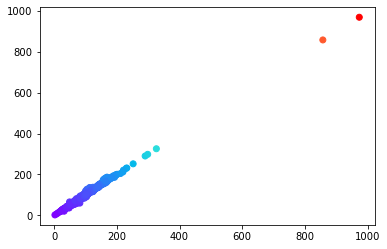

In [17]:
plt.scatter(Agriculture.loc[: ,'Value'],Food.loc[: ,'Value'], c=Food.loc[: ,'Value'] ,cmap='rainbow')

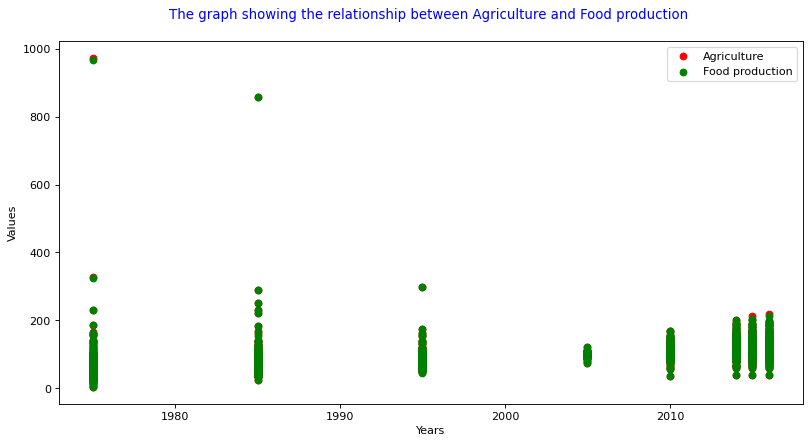

In [18]:
# Extracting values of Agriculture
# Extracting values of Food production

# Visualize 

x1=Food['Year']
x2=Agriculture['Year']

plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(x2,Agriculture['Value'], color='r', label='Agriculture')
plt.scatter(x1,Food['Value'], color='g', label='Food production')
plt.title('The graph showing the relationship between Agriculture and Food production \n', color='b')
plt.xlabel('Years')
plt.ylabel('Values')
plt.legend()
plt.show()



In [19]:
#africa_regions=[i for i in list(data['region'].unique()) if "Africa" in i]

In [20]:
africa_data = data[data['region'].isin(africa_regions)]